#### Explore AI Academy: Classification Project


<div style="font-size: 35px">
    <font color='Blue'> <b>Analysing News Articles Dataset</b></font> 

<a id="cont"></a>

## Table of Contents
1. Project Overview
     1.1 Introduction
        1.1.1 Problem Statement
     1.2 Objectives
2. Importing Packages
3. Loading Data
4. Data Cleaning
5. Exploratory Data Analysis (EDA)
6. Feature Engineering
7. Modeling
8. Model Performance
10.Final Deployment

> <b> Objective of the Project:</b> To create classification models using Python and deploy it as a web application with Streamlit. The aim is to provide you with a hands-on demonstration of applying machine learning techniques to natural language processing tasks. The primary stakeholders for the news classification project for the news outlet could include the editorial team, IT/tech support, management, readers, etc. These groups are interested in improved content categorization, operational efficiency, and enhanced user experience.

> <b> Data Source:</b> To create classification models using Python and deploy it as a web application with Streamlit. The aim is to provide you with a hands-on demonstration of applying machine learning techniques to natural language processing tasks.

> <b> Importance of the Study:</b> The dataset is comprised of news articles that need to be classified into categories based on their content, including Business, Technology, Sports, Education, and Entertainment. You can find both the train.csv and test.csv datasets here: https://raw.githubusercontent.com/Jana-Liebenberg/2401PTDS_Classification_Project/refs/heads/main/Data/processed/train.csv

> <b> Methodology Overview:</b> This end-to-end project encompasses the entire workflow, including data loading, preprocessing, model training, evaluation, and final deployment.

> <b> Structure of the Notebook:</b> The notebook will be structured with the following headings data loading, preprocessing, model training, evaluation, and final deployment.


## Project Links

- Trello Board Link: https://trello.com/b/JCd6rGTF/classification
- Presentation Deck:
- Streamlit Link:

- #### 1.1.1 Problem Statement <a class="anchor" id="sub_section_1_1_1"></a>

 Build news classification model using deep learning teechniques and deploy model for reporters to classify and label news articles.

### 1.2 Objectives <a class="anchor" id="section_1_2"></a>

+ To apply exploratory data analysis.
+ To implement feature engineering techniques to extract meaningful information.
+ To model and assess various supervised machine learning algorithms for the prediction



## 2. Importing Packages <a class="anchor" id="chapter2"></a>

This data set was created to list all shows available on Netflix streaming, and analyze the data to find interesting facts. This data was acquired in July 2022 containing data available in the United States.

+ For data manipulation and analysis, `Pandas` and `Numpy`.
+ For data visualization, `Matplotlib` and `Seaborn`.

Three techniques to vectorize the text data:

+ Segment text into words, and convert word into a vector
+ Segment text into charactors, and transform each chractors into a vector.
+ Extract n-grams of words, and transform each n-grams into a vector.

In [1]:
# Libraries for data loading, manipulation and analysis

import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt

# Displays output inline
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

#NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import cross_validate

from sklearn.feature_selection import chi2

# set plot style
sns.set_theme()

# Libraries for Handing Errors
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [2]:
import requests
import joblib 

## Environment

## 3. Loading Data <a class="anchor" id="chapter3"></a>

In [3]:
# Read the train dataset
train = pd.read_csv('https://raw.githubusercontent.com/Jana-Liebenberg/2401PTDS_Classification_Project/refs/heads/main/Data/processed/train.csv')
train.head()

,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,https://indianexpress.com/article/business/eco...,business


### 3.3 Data Pre-Processing  

The datasets, namely train.csv and test.csv, are imported, followed by a cleaning and processing phase to convert the data into a format suitable for classification.

In [4]:
# Load the datasets
train_data = pd.read_csv('https://raw.githubusercontent.com/Jana-Liebenberg/2401PTDS_Classification_Project/refs/heads/main/Data/processed/train.csv')  
test_data = pd.read_csv('https://raw.githubusercontent.com/Jana-Liebenberg/2401PTDS_Classification_Project/refs/heads/main/Data/processed/test.csv')    

# Displaying basic information and the first few rows of each dataset 
train_info = train_data.info()
train_head = train_data.head()
test_info = test_data.info()
test_head = train_data.head()

train_info, train_head, test_info, test_head

# Drop the 'url' column
print('Dropping URL column...')
train_data.drop(columns=['url'], inplace=True, errors='ignore')
test_data.drop(columns=['url'], inplace=True, errors='ignore')

# Display the first few rows to verify
print(train_data.head())
print(test_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    5520 non-null   object
 1   description  5520 non-null   object
 2   content      5520 non-null   object
 3   url          5520 non-null   object
 4   category     5520 non-null   object
dtypes: object(5)
memory usage: 215.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    2000 non-null   object
 1   description  2000 non-null   object
 2   content      2000 non-null   object
 3   url          2000 non-null   object
 4   category     2000 non-null   object
dtypes: object(5)
memory usage: 78.3+ KB
Dropping URL column...
                                           headlines  \
0  RBI revises definition of politically-exposed ...

In [5]:
# Combine text columns for the training set
train_data['combined_text'] = train_data['headlines'] + ' ' + train_data['description'] + ' ' + train_data['content']

# Combine text columns for the test set
test_data['combined_text'] = test_data['headlines'] + ' ' + test_data['description'] + ' ' + test_data['content']

# Convert all text in the 'combined_text' column to lowercase
print('Lowering case...')
train_data['combined_text'] = train_data['combined_text'].str.lower()
test_data['combined_text'] = test_data['combined_text'].str.lower()

# Define a function to remove punctuation and numbers from the 'combined_text' column
import string

print('Cleaning punctuation...')
def remove_punctuation_numbers(post):
    punc_numbers = string.punctuation + '0123456789'
    return ''.join([l for l in post if l not in punc_numbers])

# Apply the remove_punctuation_numbers function to the 'combined_text' column
train_data['combined_text'] = train_data['combined_text'].apply(remove_punctuation_numbers)
test_data['combined_text'] = test_data['combined_text'].apply(remove_punctuation_numbers)

# Print the cleaned columns
print(train_data['combined_text'])
print(test_data['combined_text'])


Lowering case...
Cleaning punctuation...
0       rbi revises definition of politicallyexposed p...
1       ndtv q net profit falls  to rs  crore impacted...
2       akasa air ‘well capitalised’ can grow much fas...
3       india’s current account deficit declines sharp...
4       states borrowing cost soars to  highest so far...
                              ...                        
5515    samsung sends out invites for ‘unpacked ’ new ...
5516    google pixel  pro accidentally appears on offi...
5517    amazon ad on google search redirects users to ...
5518    elon musk’s x previously twitter now worth les...
5519    apple’s ios  update released and here’s how it...
Name: combined_text, Length: 5520, dtype: object
0       nlc india wins contract for power supply to ra...
1       sbi clerk prelims exams dates announced admit ...
2       golden globes michelle yeoh will ferrell angel...
3       oneplus nord  at rs  as part of new price cut ...
4       adani family’s partners used ‘op

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
# Drop missing values (if any)
train_data = train_data.dropna(subset=['combined_text', 'category'])
test_data = test_data.dropna(subset=['combined_text', 'category'])

# Extract features (text) and target (category)
X_train = train_data['combined_text']
y_train = train_data['category']
X_test = test_data['combined_text']
y_test = test_data['category']

# Convert the target variable into numerical labels (if it's categorical)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert text to features using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

### EDA

In [8]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


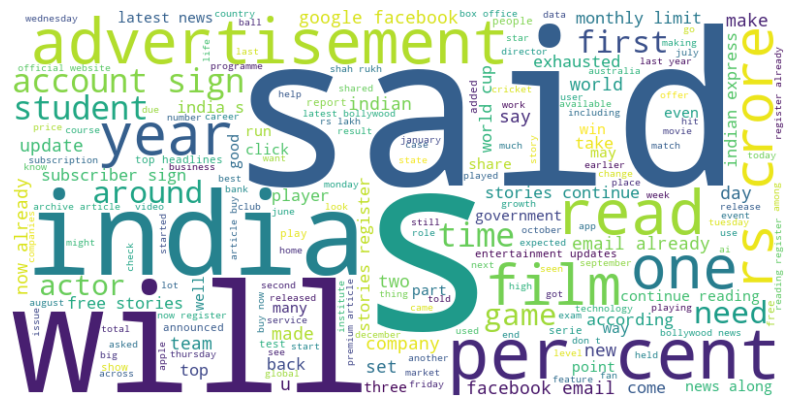

In [9]:
from wordcloud import WordCloud

# Combine all text data
text_data = ' '.join(test_data['combined_text'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


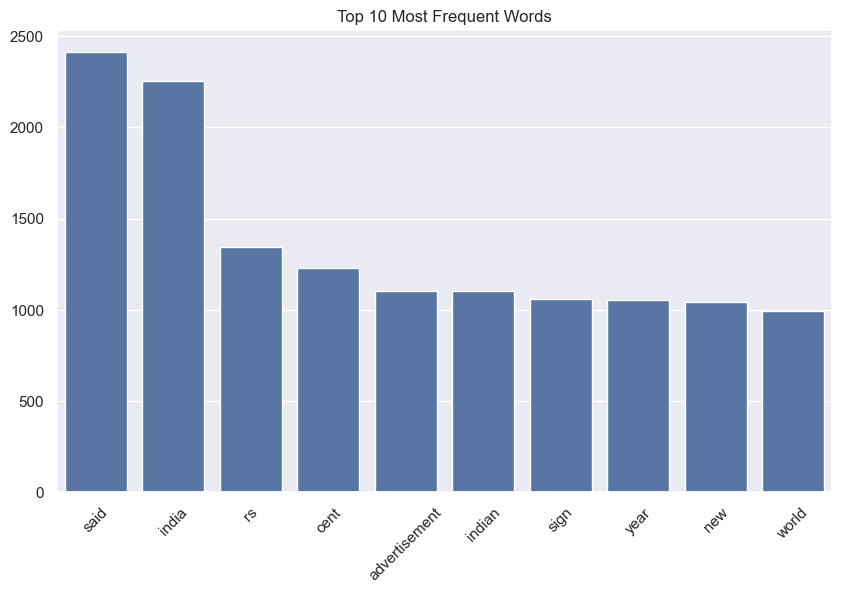

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=10)
word_counts = vectorizer.fit_transform(test_data['combined_text']).toarray()
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0)))
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

words, counts = zip(*sorted_word_freq)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(words), y=list(counts))
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()


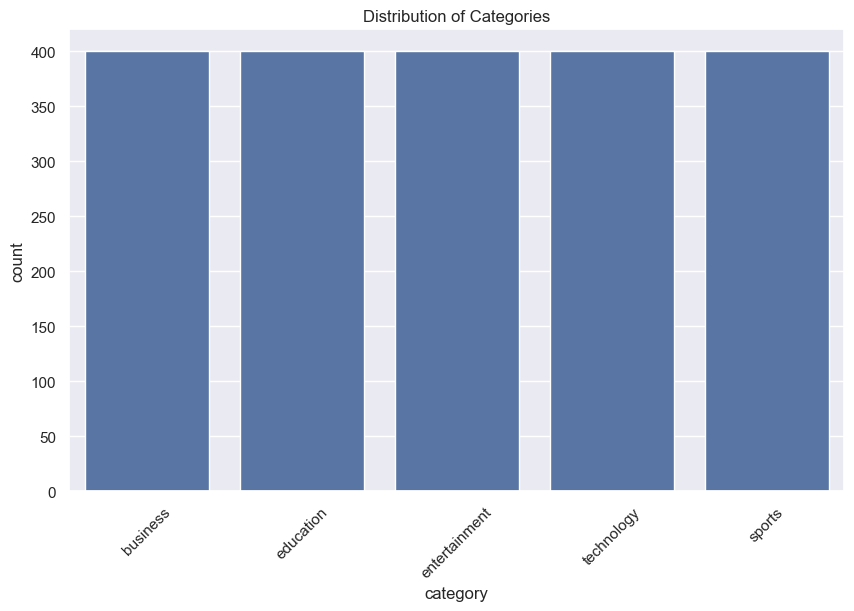

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of categories
plt.figure(figsize=(10,6))
sns.countplot(x='category', data=test_data)
plt.title('Distribution of Categories')
plt.xticks(rotation=45)
plt.show()


### Train-Test Split 

In [12]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_tfidf, y_train_encoded, test_size=0.2, random_state=42)


### Train Models

##### Logistic Regression 

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [14]:
# Initialize and train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_tfidf, y_train_encoded)

# Predictions
y_pred_log_reg = log_reg.predict(X_test_tfidf)

# Evaluate the model
print("Logistic Regression - Accuracy:", accuracy_score(y_test_encoded, y_pred_log_reg))
print(classification_report(y_test_encoded, y_pred_log_reg))


Logistic Regression - Accuracy: 0.9745
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       400
           1       0.99      0.99      0.99       400
           2       0.99      0.98      0.99       400
           3       0.99      0.98      0.98       400
           4       0.93      0.97      0.95       400

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



##### Random Forest Classifier 


In [15]:
# Initialize and train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train_encoded)

# Predictions
y_pred_rf = rf_classifier.predict(X_test_tfidf)

# Evaluate the model
print("Random Forest - Accuracy:", accuracy_score(y_test_encoded, y_pred_rf))
print(classification_report(y_test_encoded, y_pred_rf))


Random Forest - Accuracy: 0.967
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       400
           1       0.98      0.99      0.98       400
           2       0.99      0.96      0.98       400
           3       0.99      0.96      0.98       400
           4       0.91      0.97      0.94       400

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



## Evaluate Models 

In [16]:
# Display classification reports for all models
print("Logistic Regression Classification Report:")
print(classification_report(y_test_encoded, y_pred_log_reg))

print("Random Forest Classification Report:")
print(classification_report(y_test_encoded, y_pred_rf))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       400
           1       0.99      0.99      0.99       400
           2       0.99      0.98      0.99       400
           3       0.99      0.98      0.98       400
           4       0.93      0.97      0.95       400

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       400
           1       0.98      0.99      0.98       400
           2       0.99      0.96      0.98       400
           3       0.99      0.96      0.98       400
           4       0.91      0.97      0.94       400

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      20

In [17]:
pip install pipreqs

Note: you may need to restart the kernel to use updated packages.


In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import re
import nltk

nltk.download('all')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import HashingVectorizer



[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\F8871636\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\F8871636\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\F8871636\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\F8871636\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\F8871636\AppData\Roaming

In [19]:
#Preprocessing For Modeling

train_data['clean_content'] = train['content'].str.lower()
train_data['clean_desr'] = train['description'].str.lower()

# Tokenization - process of splitting text into individual words (tokens)
train_data['content_tokens'] = train_data['clean_content'].apply(word_tokenize)
train_data['descr_tokens'] = train_data['clean_desr'].apply(word_tokenize)

#Stemming -  Stemming trims the ends of words, while Lemmatization reduces words to their dictionary form
stemmer = PorterStemmer()
train_data['stemmed_text'] = train_data['content_tokens'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x]))
train_data['stemmed_descr'] = train_data['descr_tokens'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x]))

# Lemmatization
lemmatizer = WordNetLemmatizer() 
train_data['content_lemma'] = train_data['content_tokens'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x]))
train_data['descr_lemma'] = train_data['descr_tokens'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x]))

train_data[['content', 'content_tokens','stemmed_text','content_lemma']].head()

,content,content_tokens,stemmed_text,content_lemma
0,The Reserve Bank of India (RBI) has changed th...,"[the, reserve, bank, of, india, (, rbi, ), has...",the reserv bank of india ( rbi ) ha chang the ...,the reserve bank of india ( rbi ) ha changed t...
1,Broadcaster New Delhi Television Ltd on Monday...,"[broadcaster, new, delhi, television, ltd, on,...",broadcast new delhi televis ltd on monday repo...,broadcaster new delhi television ltd on monday...
2,Homegrown server maker Netweb Technologies Ind...,"[homegrown, server, maker, netweb, technologie...",homegrown server maker netweb technolog india ...,homegrown server maker netweb technology india...
3,India’s current account deficit declined sharp...,"[india, ’, s, current, account, deficit, decli...",india ’ s current account deficit declin sharp...,india ’ s current account deficit declined sha...
4,States have been forced to pay through their n...,"[states, have, been, forced, to, pay, through,...",state have been forc to pay through their nose...,state have been forced to pay through their no...


In [20]:
# Model parameters
MAX_WORDS = 5000    # Maximum number of words to keep
MAX_LEN = 50      # Maximum length of each headline
EMBEDDING_DIM = 200  # Dimensionality of word embeddings
VALIDATION_SPLIT = 0.2
RANDOM_SEED = 42
BATCH_SIZE = 32
EPOCHS = 20

### Sentiment Analysis via - VADER

In [21]:
pip install vaderSentiment

In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment_vader = SentimentIntensityAnalyzer()
train['content_polarity_vader'] = train_data['clean_content'].apply(lambda text: sentiment_vader.polarity_scores(text)['compound'])
train['decr_polarity_vader'] = train_data['clean_desr'].apply(lambda text: sentiment_vader.polarity_scores(text)['compound'])

In [23]:
train[['content','content_polarity_vader','description','decr_polarity_vader']].head()

,content,content_polarity_vader,description,decr_polarity_vader
0,The Reserve Bank of India (RBI) has changed th...,0.9524,The central bank has also asked chairpersons a...,0.4767
1,Broadcaster New Delhi Television Ltd on Monday...,0.7717,NDTV's consolidated revenue from operations wa...,0.0000
2,Homegrown server maker Netweb Technologies Ind...,0.9801,The initial share sale will be open for public...,0.2960
3,India’s current account deficit declined sharp...,-0.9042,The current account deficit (CAD) was 3.8 per ...,-0.4019
4,States have been forced to pay through their n...,-0.0772,The prices shot up reflecting the overall high...,0.2263


In [24]:
#Updated the boundary to be tighter from 0 -> 0.05
def sentiment_category_vader(polarity):
        if polarity >= 0.05:
            return "Positive"
        elif polarity <= -0.05:
            return "Negative"
        else:
            return "Neutral"

In [25]:
train['description_predicted_sentiment'] = train['decr_polarity_vader'].apply(sentiment_category_vader)
train['content_predicted_sentiment'] = train['content_polarity_vader'].apply(sentiment_category_vader)

In [26]:
train[['content','content_polarity_vader','content_predicted_sentiment','description','decr_polarity_vader','description_predicted_sentiment']].head()

,content,content_polarity_vader,content_predicted_sentiment,description,decr_polarity_vader,description_predicted_sentiment
0,The Reserve Bank of India (RBI) has changed th...,0.9524,Positive,The central bank has also asked chairpersons a...,0.4767,Positive
1,Broadcaster New Delhi Television Ltd on Monday...,0.7717,Positive,NDTV's consolidated revenue from operations wa...,0.0000,Neutral
2,Homegrown server maker Netweb Technologies Ind...,0.9801,Positive,The initial share sale will be open for public...,0.2960,Positive
3,India’s current account deficit declined sharp...,-0.9042,Negative,The current account deficit (CAD) was 3.8 per ...,-0.4019,Negative
4,States have been forced to pay through their n...,-0.0772,Negative,The prices shot up reflecting the overall high...,0.2263,Positive


Content Sentiment Summary:
content_predicted_sentiment
Positive    4517
Negative     718
Neutral      285
Name: count, dtype: int64


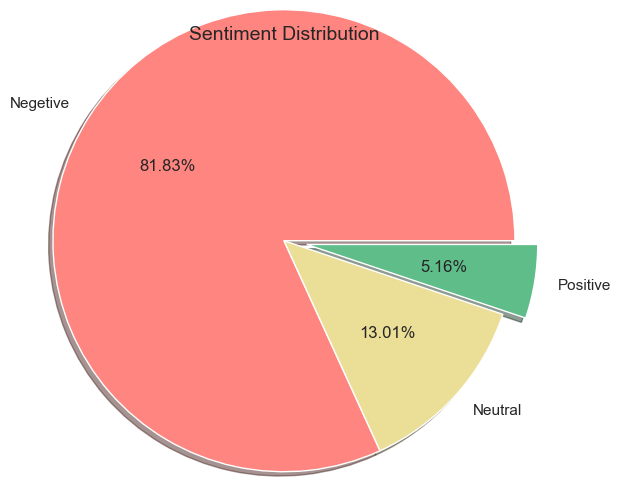


Description Sentiment Summary:
description_predicted_sentiment
Positive    2666
Neutral     1944
Negative     910
Name: count, dtype: int64


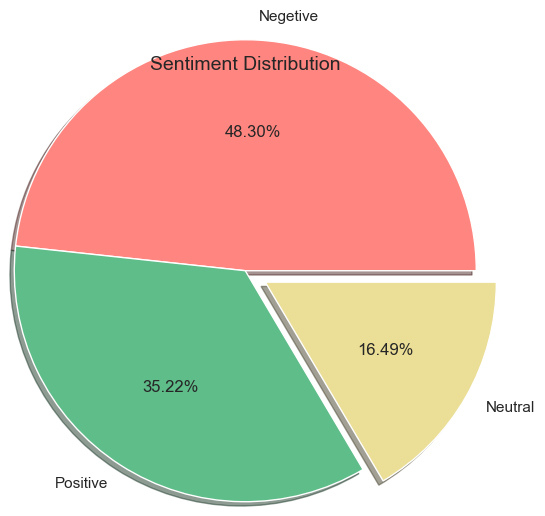

In [27]:
# Count the sentiment distribution for title sentiment
content_sentiment_summary = train['content_predicted_sentiment'].value_counts()

# Display the summaries
print("Content Sentiment Summary:")
print(content_sentiment_summary)
plt.figure(figsize=(10, 5))
colors = ['#FF8680','#EBDE96', '#5EBD89']
plt.pie(train['content_predicted_sentiment'].value_counts(), labels=['Negetive','Neutral','Positive'], shadow=True,
        explode=[0, 0, 0.15], autopct='%1.2f%%', radius=1.5, colors=colors)
plt.title('Sentiment Distribution', fontsize=14)
plt.show()

# Count the sentiment distribution for description sentiment
description_sentiment_summary = train['description_predicted_sentiment'].value_counts()

print("\nDescription Sentiment Summary:")
print(description_sentiment_summary)
plt.figure(figsize=(10, 5))
colors = ['#FF8680', '#5EBD89','#EBDE96']
plt.pie(train['description_predicted_sentiment'].value_counts(), labels=['Negetive','Positive','Neutral'], shadow=True,
        explode=[0, 0, 0.15], autopct='%1.2f%%', radius=1.5, colors=colors)
plt.title('Sentiment Distribution', fontsize=14)
plt.show()

### Model Creation and Training

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report

X = train_data['descr_lemma']
Y = train['description_predicted_sentiment']

# tfidf = TfidfVectorizer()

vectorizer = HashingVectorizer()
X_vectorized = vectorizer.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_vectorized, Y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

# Detailed performance report
print(classification_report(Y_test, Y_pred))

Logistic Regression Accuracy: 0.5960144927536232
              precision    recall  f1-score   support

    Negative       0.69      0.11      0.19       201
     Neutral       0.63      0.52      0.57       384
    Positive       0.58      0.84      0.68       519

    accuracy                           0.60      1104
   macro avg       0.63      0.49      0.48      1104
weighted avg       0.62      0.60      0.55      1104



In [29]:
X = train_data['content_lemma']
Y = train['content_predicted_sentiment']

#tfidf = TfidfVectorizer()
vectorizer = HashingVectorizer(n_features=20000)
X_vectorized = vectorizer.transform(train_data['content_lemma'])

X_train, X_test, Y_train, Y_test = train_test_split(X_vectorized, Y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

print(classification_report(Y_test, Y_pred))

Logistic Regression Accuracy: 0.8143115942028986
              precision    recall  f1-score   support

    Negative       0.92      0.07      0.13       155
     Neutral       0.62      0.12      0.21        64
    Positive       0.82      0.99      0.90       885

    accuracy                           0.81      1104
   macro avg       0.78      0.40      0.41      1104
weighted avg       0.82      0.81      0.75      1104



In [30]:
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')

hashing_vectorizer_config = {'n_features': 20000}

# Save the configuration to a file
joblib.dump(hashing_vectorizer_config, 'hashing_vectorizer_config.pkl')

['hashing_vectorizer_config.pkl']

### Naive Baye's
#### (To check and observe the different models behaviour on the same dataset)

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

tfidf = TfidfVectorizer()
X_vectorized = tfidf.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_vectorized, Y, test_size=0.2, random_state=42) 

model = MultinomialNB()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(f"Naive Baye's Accuracy: {accuracy_score(Y_test,Y_pred)}")

Naive Baye's Accuracy: 0.8016304347826086


### Support Vector Machine (SVM)

In [32]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, Y_train)
Y_pred_svm = svm_model.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(Y_test, Y_pred_svm)}")

SVM Accuracy: 0.8097826086956522
